`Martín Alexis Martínez Andrade`

**This notebook was made in Google Colab.**

In [ ]:
!pip install vaderSentiment

# P6: Data Classification

Create a model using K-Nearest-Neighbor and test it.

## (Optional) Download modified_clean_data.csv from Dropbox

In [ ]:
# download file from dropbox
!wget -O modified_clean_data.csv https://www.dropbox.com/scl/fi/8pnm0884bksvfcyxep4ec/modified_clean_data.csv?rlkey=n8qd7e299e1bydtfiwemsdeig&st=89yik26c&dl=1

## Load dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv(f"modified_clean_data.csv")

## What should we create use a K-Nearest Neighbor?

In the previous practice, we tried modeling *review sentiment vs helpfulness score* as a linear regression. Now, let's try using a KNN classifier.

## Review sentiment vs Helpfulness Score

### Filter reviews with at least 10 or more votes

In [6]:
# keep only reviews with N or more votes
n_votes_threshold = 10
df_filtered = df[df['HelpfulnessDenominator'] >= n_votes_threshold]
print(f"Reviews kept (reviews with {n_votes_threshold} or more votes): {df_filtered.shape[0]}")

Reviews kept (reviews with 10 or more votes): 17470


In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(str(text))
    return vs['compound'] # [-1 ... 1], best as continuous variable

df_sampled = df_filtered.copy().dropna(subset=['Text'])
df_sampled['Sentiment'] = df_sampled['Text'].apply(get_vader_sentiment)

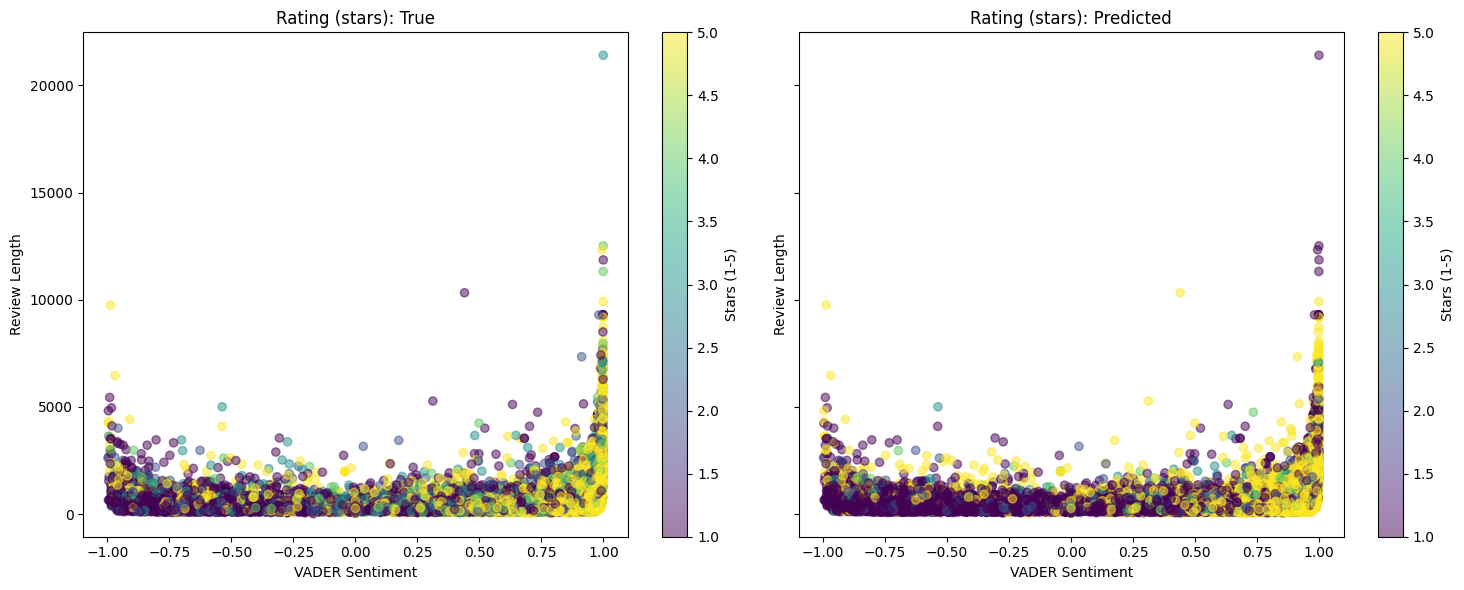

In [8]:
X = df_sampled[['Sentiment', 'ReviewLength']].values
# Target: Score 1,2,3,4,5
y = df_sampled['Score'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=73)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
df_sampled['Score_pred'] = knn.predict(X)

# Plot true and predicted (colored by star rating)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
for i, col in enumerate(['Score', 'Score_pred']):
    scatter = axes[i].scatter(
        df_sampled['Sentiment'], df_sampled['ReviewLength'],
        c=df_sampled[col], cmap='viridis', alpha=0.5
    )
    axes[i].set_xlabel("VADER Sentiment")
    axes[i].set_ylabel("Review Length")
    axes[i].set_title(f"Rating (stars): {'True' if col=='Score' else 'Predicted'}")
    plt.colorbar(scatter, ax=axes[i], label="Stars (1-5)")
plt.tight_layout()
plt.show()

The KNN model seems to somewhat capture the general areas of VADER Sentiment and Review Length in relationship to the stars given by the review. It's not overfitted, as it generalizes the areas and doesn't predict correctly some very specific datapoints. In general, it seems to be a good model to predict the stars of a review given its text sentiment and length.